## CanCovidData

[CanCovidData](https://github.com/mountainMath/CanCovidData) is an R package, written by [Jens von Bergmann](https://github.com/mountainMath) for gathering and processing sources of covid-19 data. It includes import functions for international and Canadian data and provides some helper functions for data processing and graphing.

The CanCovidData library has been installed for the R kernel used on this syzygy instance. It can be used directly, but if you are more familiar with python this notebook shows how to access it via the [rpy2 module](https://rpy2.github.io/).


In [25]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import math
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,10)

`importr` the R library

In [13]:
CanCovidData = importr("CanCovidData")

provincial_data_r = CanCovidData.get_canada_official_provincial_data();
country_data_r = CanCovidData.get_country_timeline_ecdc_jhs_data();
bc_case_data_r = CanCovidData.get_british_columbia_case_data()
bc_test_data_r = CanCovidData.get_british_columbia_test_data()

R[write to console]: Parsed with column specification:
cols(
  pruid = col_double(),
  prname = col_character(),
  prnameFR = col_character(),
  date = col_character(),
  numconf = col_double(),
  numprob = col_double(),
  numdeaths = col_double(),
  numtotal = col_double(),
  numtested = col_double(),
  numrecover = col_character(),
  percentrecover = col_character(),
  ratetested = col_logical(),
  numtoday = col_double(),
  percentoday = col_double()
)



In [14]:
with localconverter(ro.default_converter + pandas2ri.converter):
  ProvincialDF = ro.conversion.rpy2py(provincial_data_r)
  CountryDF = ro.conversion.rpy2py(country_data_r)
  BCTestDF = ro.conversion.rpy2py(bc_test_data_r)
  BCCaseDF = ro.conversion.rpy2py(bc_case_data_r)

In [10]:
ProvincialDF

,PR_UID,prname,prnameFR,shortProvince,Date,Confirmed,Offical confirmed,Probable,Deaths,Cases,Tested
1,35.0,Ontario,Ontario,ON,18292.0,3.0,3.0,0.0,0.0,3.0,NaN
2,59.0,British Columbia,Colombie-Britannique,BC,18292.0,1.0,1.0,0.0,0.0,1.0,NaN
3,1.0,Canada,Canada,CAN,18292.0,4.0,4.0,0.0,0.0,4.0,NaN
4,35.0,Ontario,Ontario,ON,18300.0,3.0,3.0,0.0,0.0,0.0,NaN
5,59.0,British Columbia,Colombie-Britannique,BC,18300.0,4.0,4.0,0.0,0.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
623,60.0,Yukon,Yukon,YT,18369.0,8.0,8.0,0.0,0.0,NaN,849.0
624,61.0,Northwest Territories,Territoires du Nord-Ouest,NT,18369.0,5.0,5.0,0.0,0.0,NaN,1438.0
625,62.0,Nunavut,Nunavut,NU,18369.0,0.0,0.0,0.0,0.0,NaN,286.0
626,99.0,Repatriated,Voyageurs rapatriés,Repatriated,18369.0,13.0,13.0,0.0,NaN,NaN,NaN


In [11]:
CountryDF

,Country,Date,Confirmed,Deaths,Recovered,Active,Cases
1,Afghanistan,18261.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,18261.0,0.0,0.0,0.0,0.0,0.0
3,Armenia,18261.0,0.0,0.0,0.0,0.0,0.0
4,Australia,18261.0,0.0,0.0,0.0,0.0,0.0
5,Austria,18261.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
17533,Zimbabwe,18364.0,14.0,3.0,0.0,11.0,0.0
17534,Zimbabwe,18365.0,17.0,3.0,0.0,14.0,3.0
17535,Zimbabwe,18366.0,17.0,3.0,0.0,14.0,0.0
17536,Zimbabwe,18367.0,23.0,3.0,1.0,19.0,6.0


In [15]:
BCCaseDF

,Reported Date,Health Authority,Age group,Sex
1,18336.0,Fraser,30-39,M
2,18344.0,Fraser,50-59,F
3,18348.0,Fraser,50-59,F
4,18354.0,Fraser,40-49,M
5,18362.0,Fraser,89+,F
...,...,...,...,...
1571,18366.0,Vancouver Coastal,Unknown,U
1572,18366.0,Vancouver Coastal,Unknown,U
1573,18366.0,Vancouver Coastal,Unknown,U
1574,18366.0,Vancouver Coastal,Unknown,U


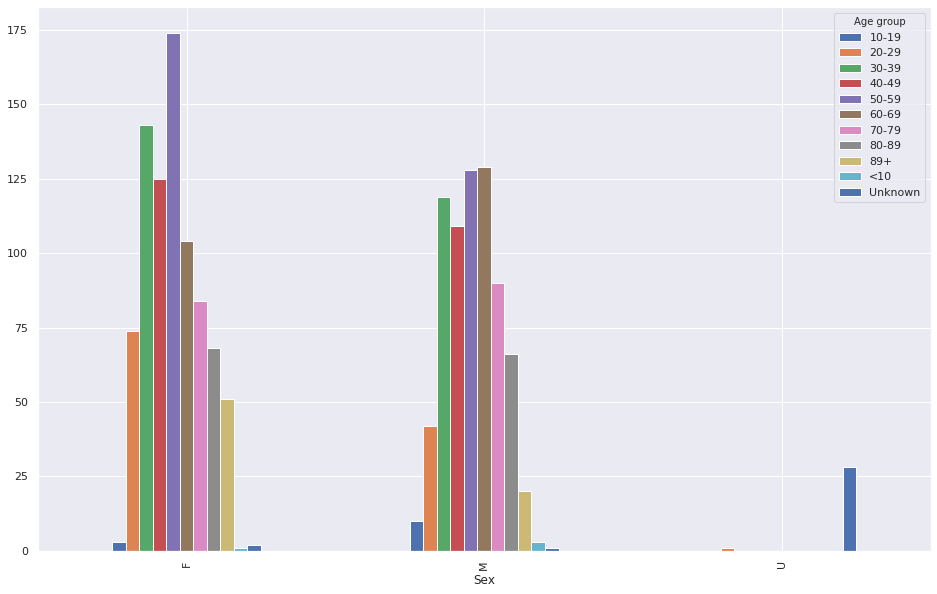

In [26]:
BCCaseDF.groupby('Sex')['Age group'].value_counts().unstack().fillna(0).plot(kind='bar')